# Exploratory data analysis

### Importing the dataset

In [1]:
import pandas as pd
kidney_disease = pd.read_csv(r'Data/original_dataset.csv')
kidney_disease.columns = ['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
                          'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
                          'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
                          'potassium', 'hemoglobin', 'packed_cell_volume',
                          'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
                          'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
                          'peda_edema', 'aanemia', 'classification']
# We drop the id column because it is not relevant for this analysis
kidney_disease.drop(columns=["id"], inplace=True)
display(kidney_disease)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


### Checking the shape of the datashape

In [2]:
print(kidney_disease.shape)

(400, 25)


400 rows and 26 columns

## Correlation between features

<AxesSubplot:>

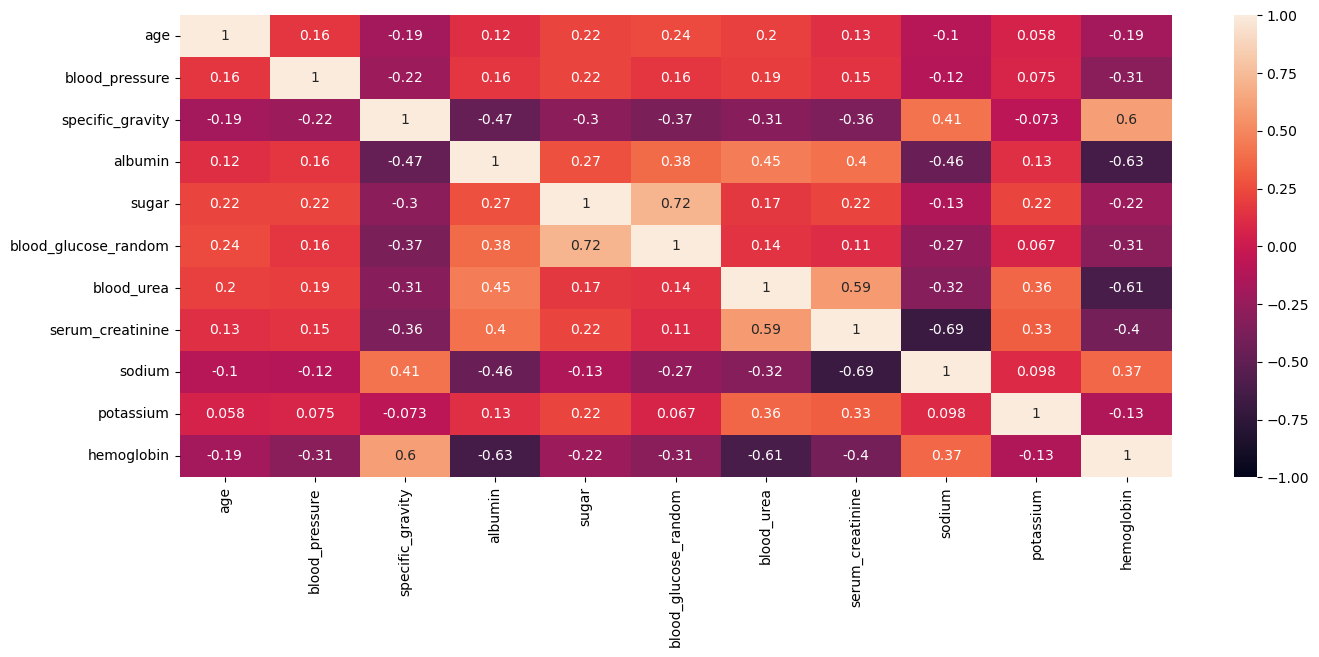

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 6))
sns.heatmap(kidney_disease.corr(), vmin=-1, vmax=1, annot=True)

## Checking for outliers

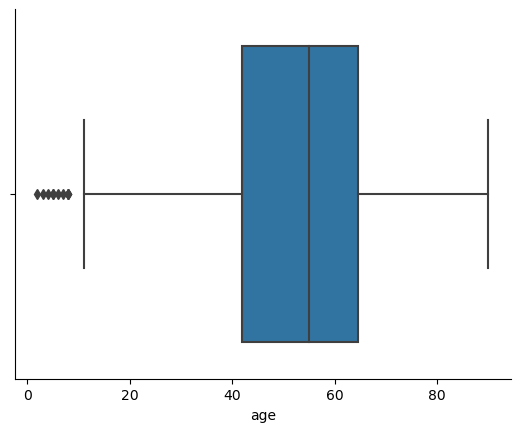

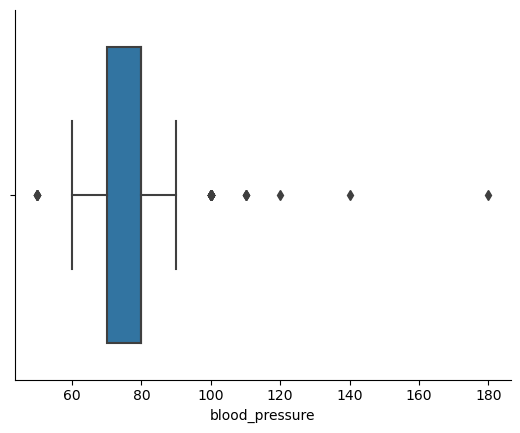

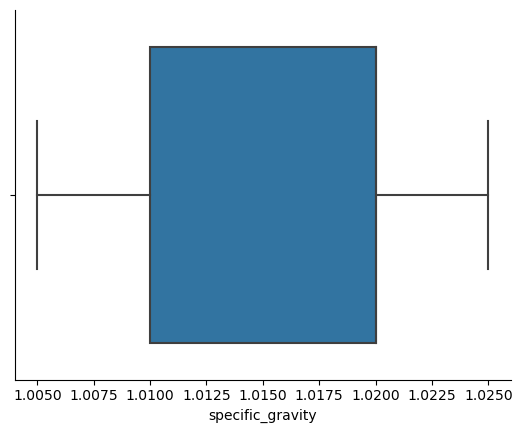

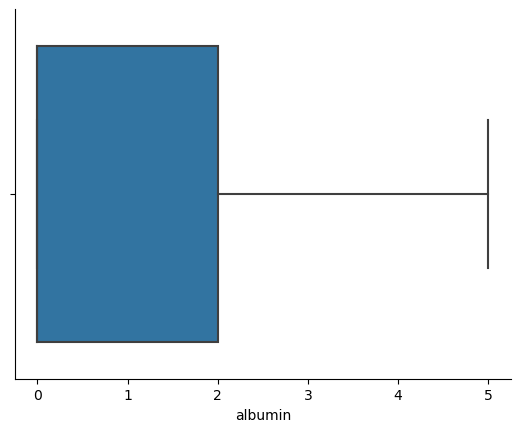

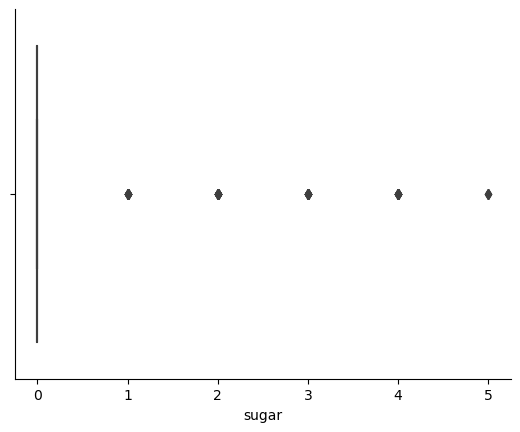

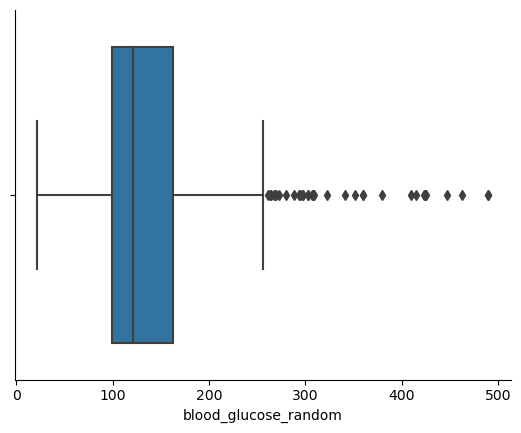

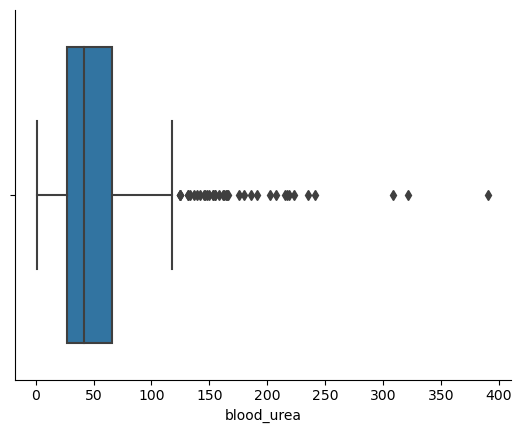

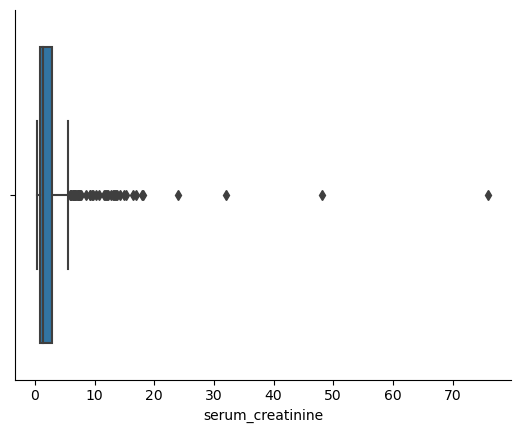

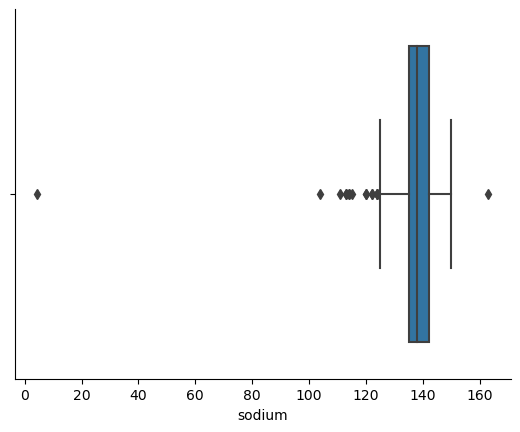

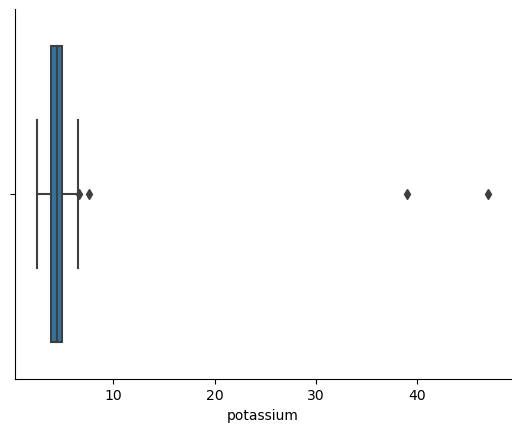

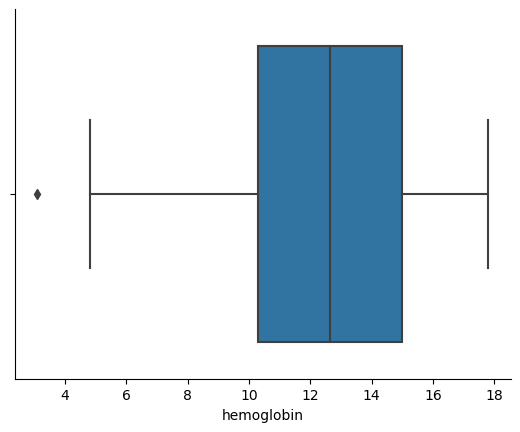

In [4]:
from matplotlib import pyplot as plt

# Iterate over all columns in the DataFrame
for column_name in kidney_disease.columns:
    # Select the column
    column = kidney_disease[column_name]

    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(column):
        # Create a box plot for the column
        sns.boxplot(x=column)
        sns.despine()

        # Show the plot
        plt.show()

## Check for duplicates

In [5]:
# Find duplicate rows
duplicates = kidney_disease[kidney_disease.duplicated()]

# Print the duplicate rows
display(duplicates)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,classification


No duplicates in the dataset

## Checking rows with null values

In [6]:
null_rows = kidney_disease.isnull().any(axis=1).sum()
print(null_rows, "rows have null valus")
percentage = null_rows/len(kidney_disease.index)*100
print("{}% of rows have null values in some colums".format(percentage))

242 rows have null valus
60.5% of rows have null values in some colums
